In [1]:
!conda info


     active environment : base37
    active env location : /home/alex/anaconda3/envs/base37
            shell level : 2
       user config file : /home/alex/.condarc
 populated config files : /home/alex/.condarc
          conda version : 4.9.2
    conda-build version : 3.20.5
         python version : 3.8.5.final.0
       virtual packages : __cuda=11.2=0
                          __glibc=2.31=0
                          __unix=0=0
                          __archspec=1=x86_64
       base environment : /home/alex/anaconda3  (writable)
           channel URLs : https://conda.anaconda.org/conda-forge/linux-64
                          https://conda.anaconda.org/conda-forge/noarch
                          https://repo.anaconda.com/pkgs/main/linux-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/linux-64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /home/alex/an

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
import torchvision
from PIL import Image
from IPython.display import Image
from tqdm import trange, tqdm
import wandb
from time import time

In [2]:
batch_size = 100

# train_transform = transforms.Compose([
#         transforms.RandomRotation(5),
#         transforms.RandomHorizontalFlip(p = 0.5),
#         transforms.ColorJitter(brightness=0.5, contrast= 0.5, saturation= 0.5, hue=0.1),
#         transforms.RandomAffine(degrees = 20, shear = 10, scale = (0.7, 1.05)),
#         transforms.GaussianBlur(kernel_size = 3, sigma=(0.5,0.5)),
#         transforms.ToTensor()])

train_transform = transforms.Compose([
        transforms.RandomRotation(5),
        transforms.RandomHorizontalFlip(),
        transforms.RandomAffine(degrees = 10, shear = 10, scale = (0.7, 1.05)),
        transforms.ToTensor()])
    
val_transform = transforms.Compose([
        transforms.ToTensor()])



data_train = torchvision.datasets.ImageFolder('tiny-imagenet-2020/tiny-imagenet-200/train', transform=train_transform)
data_val = torchvision.datasets.ImageFolder('tiny-imagenet-2020/tiny-imagenet-200/val', transform=val_transform)
train_loader = torch.utils.data.DataLoader(data_train, batch_size=batch_size,shuffle=True)
val_loader = torch.utils.data.DataLoader(data_val, batch_size=batch_size,shuffle=True)



In [9]:
for x, y in train_loader: 
    a = model.forward(x)
    print(a.shape)
    break

torch.Size([100, 200])


In [3]:
def plot_samples(loader):
    g = 0
    fig,ax = plt.subplots(1,6, figsize = (20,7))
    for test_images, test_labels in loader:  
        sample_image = test_images[0]    # Reshape them according to your needs.
        sample_label = test_labels[0]
        sample_image = np.swapaxes(sample_image,0,2)
        sample_image = np.swapaxes(sample_image,0,1)
        ax[g].imshow(sample_image)
        ax[g].set_title('Class ' + str(sample_label.item()))
        if g == 0:
            print('Size is', test_images[0].shape)
        if g == 5:
            break
        g+=1

Size is torch.Size([3, 64, 64])


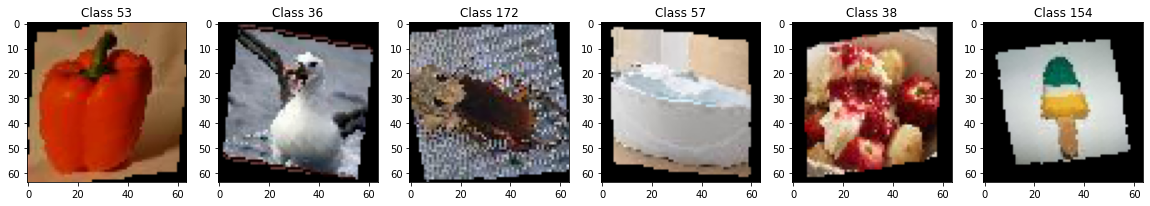

In [6]:
plot_samples(train_loader)

Size is torch.Size([3, 64, 64])


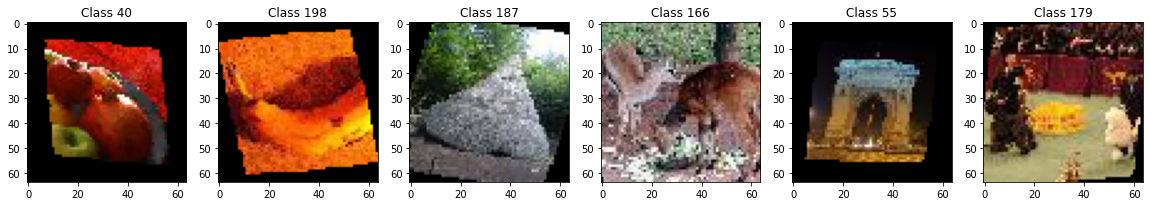

In [6]:
plot_samples(train_loader)

In [3]:
model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet18', pretrained=False)

Using cache found in /home/alex/.cache/torch/hub/pytorch_vision_v0.9.0


In [5]:
from torch import nn

In [6]:
class VGG_like(torch.nn.Module):
    def __init__(self):
        super(VGG_like, self).__init__()
        self.is_bias = False

        self.model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels= 64, kernel_size= 3, stride= 1, padding= 1, bias= self.is_bias),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels= 128, kernel_size= 3, stride= 1, padding= 1, bias= self.is_bias),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(),

            #nn.Conv2d(in_channels=128, out_channels= 128, kernel_size= 3, stride= 1, padding= 1, bias= self.is_bias),
            #nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels= 256, kernel_size= 3, stride= 1, padding= 1, bias= self.is_bias),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(),

            #nn.Conv2d(in_channels=256, out_channels= 256, kernel_size= 3, stride= 1, padding= 1, bias= self.is_bias),
            #nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels= 512, kernel_size= 3, stride= 1, padding= 1, bias= self.is_bias),
            nn.AvgPool2d(kernel_size=3), 
            nn.ReLU(),
            
            nn.Flatten(),
            nn.Linear(512*5*5, 6400),
            nn.ReLU(),
            nn.Linear(6400, 200),
            nn.LogSoftmax(dim=1)
        )
    def forward(self, x ):
        return self.model(x)


In [6]:
class VGG_like_norm(torch.nn.Module):
    def __init__(self):
        super(VGG_like_norm, self).__init__()
        self.is_bias = False

        self.model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels= 64, kernel_size= 3, stride= 1, padding= 1, bias= self.is_bias),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels= 128, kernel_size= 3, stride= 1, padding= 1, bias= self.is_bias),
            nn.MaxPool2d(kernel_size=2),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            #nn.Conv2d(in_channels=128, out_channels= 128, kernel_size= 3, stride= 1, padding= 1, bias= self.is_bias),
            #nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels= 256, kernel_size= 3, stride= 1, padding= 1, bias= self.is_bias),
            nn.MaxPool2d(kernel_size=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),

            #nn.Conv2d(in_channels=256, out_channels= 256, kernel_size= 3, stride= 1, padding= 1, bias= self.is_bias),
            #nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels= 512, kernel_size= 3, stride= 1, padding= 1, bias= self.is_bias),
            nn.AvgPool2d(kernel_size=3),
            nn.BatchNorm2d(512), 
            nn.ReLU(),
            
            nn.Flatten(),
            nn.Linear(512*5*5, 6400),
            nn.ReLU(),
            nn.Linear(6400, 200),
            nn.LogSoftmax(dim=1)
        )
    def forward(self, x ):
        return self.model(x)


    model = VGG_like_norm()


In [4]:
class DenseNet(torch.nn.Module):
    def __init__(self):
        super(DenseNet, self).__init__()

        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.batn1 = torch.nn.BatchNorm2d(32)
        self.act1  = torch.nn.ReLU()

        self.conv2 = torch.nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1) 
        self.batn2 = torch.nn.BatchNorm2d(32)
        self.act2  = torch.nn.ReLU()

        self.conv3 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.batn3 = torch.nn.BatchNorm2d(64)
        self.act3  = torch.nn.ReLU()

        #CAT
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2)
        self.conv4 = torch.nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.batn4 = torch.nn.BatchNorm2d(128)
        self.act4  = torch.nn.ReLU()

        self.conv5 = torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.batn5 = torch.nn.BatchNorm2d(256)
        self.act5  = torch.nn.ReLU()

        #CAT
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2)
        self.conv6 = torch.nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.batn6 = torch.nn.BatchNorm2d(256)
        self.act6  = torch.nn.ReLU()

        self.conv7 = torch.nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, stride=2, padding=1)
        self.batn7 = torch.nn.BatchNorm2d(128)
        self.act7  = torch.nn.ReLU()
        self.pool3 = torch.nn.AvgPool2d(kernel_size=2)

        self.flat = torch.nn.Flatten()
        self.fc1   = torch.nn.Linear(2048,200)
        self.act8 = torch.nn.LogSoftmax(dim=1)
        
    def forward(self,x):
        x = self.conv1(x)
        x = self.batn1(x)
        x = self.act1(x)
        a1 = x 

        x = self.conv2(x)
        x = self.batn2(x)
        x = self.act2(x)
        a2 = x

        x = self.conv3(x)
        x = self.batn3(x)
        x = self.act3(x)

        x = torch.cat((a1,a2,x), dim = 1)

        x = self.pool1(x)
        x = self.conv4(x)
        x = self.batn4(x)
        x = self.act4(x)
        b1 = x 

        x = self.conv5(x)
        x = self.batn5(x)
        x = self.act5(x)

        x = torch.cat((b1,x), dim = 1)

        x = self.pool2(x)
        x = self.conv6(x)
        x = self.batn6(x)
        x = self.act6(x)

        x = self.conv7(x)
        x = self.batn7(x)
        x = self.act7(x)
        x = self.pool3(x)

        x = self.flat(x)
        x = self.fc1(x)
        x = self.act8(x)

        return x   
model = DenseNet()

In [95]:
# class Flatten(torch.nn.Module):
#     def forward(self, input):
#         return input.view(input.size(0), -1)

# model = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=64,kernel_size=3 ,stride=1, padding=1, bias=False),
#                       nn.BatchNorm2d(64),
#                       nn.ReLU(inplace=True),
#                       nn.MaxPool2d(kernel_size=3,padding=1,stride=2),
#                       nn.Conv2d(in_channels=64, out_channels=128,kernel_size=3 ,stride=1, padding=1, bias=False),
#                       nn.BatchNorm2d(128),
#                       nn.ReLU(inplace=True),
#                       nn.Conv2d(in_channels=128, out_channels=128,kernel_size=3 ,stride=2, padding=1, bias=False),
#                       nn.BatchNorm2d(128),
#                       nn.ReLU(inplace=True),
#                       nn.Conv2d(in_channels=128, out_channels=256,kernel_size=3 ,stride=1, padding=1, bias=False),
#                       nn.BatchNorm2d(256),
#                       nn.ReLU(inplace=True),
#                       nn.Conv2d(in_channels=256, out_channels=256,kernel_size=3 ,stride=2, padding=1, bias=False),
#                       nn.BatchNorm2d(256),
#                       nn.ReLU(inplace=True),
#                       nn.Conv2d(in_channels=256, out_channels=512,kernel_size=3 ,stride=1, padding=1, bias=False),
#                       nn.BatchNorm2d(512),
#                       nn.ReLU(inplace=True),
#                       nn.AvgPool2d(kernel_size=3, padding=1, stride = 2),
#                       Flatten(),
#                       nn.Linear(8192, 200),
#                       nn.LogSoftmax(dim=1))


In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = torch.nn.CrossEntropyLoss()
adam_optimizer = torch.optim.Adam(model.parameters(), weight_decay = 1e-4)

wandb.init(project='Tiny_image_net', entity='albly')
wandb.watch(model)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: albly (use `wandb login --relogin` to force relogin)
/home/alex/anaconda3/envs/base37/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
wandb: wandb version 0.10.26 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [6]:
#def train(model, optimizer, train_size, batch_size, device, scheduler=None, epochs_n=100, write = False, label = None):  ## <---
def train_on_tinyimagenet(train_dataloader, val_dataloader, model, optimizer, name):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print('Starting Training using device : ', device)
    
    model.to(device)
    criterion = torch.nn.CrossEntropyLoss()
    scheduler = scheduler = torch.optim.lr_scheduler.MultiStepLR(adam_optimizer, [20, 25, 30, 37, 45], gamma = 0.05)  
    n_epochs = 100

    max_val_score = 0
    max_val_score_epoch = 0

    first_epoch_loss = 0
    train_losses = []
    train_scores = []
    val_scores = []


    for epoch in trange(n_epochs):
        
        wandb.log({'epoch': epoch})  

        model.train()
        current_loss = 0
        time_start = time()
        for x_batch, y_batch in train_loader:
            x = x_batch.to(device)
            y = y_batch.to(device)
            optimizer.zero_grad()

            preds = model(x)
            loss = criterion(preds, y)

            wandb.log({'batch_loss': loss.item()})
            current_loss += loss.item()

            loss.backward()
            optimizer.step()

        wandb.log({'Time':time() - time_start})
        if epoch == 0:
            first_epoch_loss = current_loss
        train_losses.append(current_loss/first_epoch_loss)
        wandb.log({'loss':current_loss/first_epoch_loss})

        model.eval()
        train_score = get_accuracy(model, train_loader, device)
        val_score = get_accuracy(model, val_loader, device)

        if scheduler is not None:  
            scheduler.step(1 - val_score)


        print("Validation accuracy:%.2f%%" % (val_score * 100))

        if val_score > max_val_score:
            max_val_score = val_score
            max_val_score_epoch = epoch
            torch.save(model.state_dict(), './'+name+'_best_params.pt')
        
        train_scores.append(train_score)
        val_scores.append(val_score)
        wandb.log({'Train_accuracy': train_score * 100})
        wandb.log({'Validation_accuracy': val_score* 100})

        
def set_random_seeds(seed_value=0, device = 0):
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    random.seed(seed_value)
    if device != 'cpu': 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

def get_accuracy(model, dataloader, device):
    correct = 0
    with torch.no_grad():
        for x, y in dataloader:
            x = x.to(device)  
            y = y.to(device)  
            prediction = model(x).argmax(dim=-1, keepdim=True)
            correct += prediction.eq(y.view_as(prediction)).sum().item()
    return correct / len(dataloader.dataset)

In [5]:
model= DenseNet()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load('checkpoint.pth'))
model = model.to(device)

In [8]:
validate(val_loader, model)

(0.4976, 2.3929014205932617)

In [7]:
def validate(dataloader, model):
    """
    Run model through all samples in dataloader, compute accuracy and loss.
    
    dataloader:
        torch.utils.data.DataLoader or an object with equivalent interface
        See get_dataloader().
    model:
        torch.nn.Module
        See get_model().

    return:
    accuracy:
        float
        The fraction of samples from dataloader correctly classified by model
        (top-1 accuracy). 0.0 <= accuracy <= 1.0
    loss:
        float
        Average loss over all dataloader samples.
    """
    # Your code here
    criterion = torch.nn.CrossEntropyLoss()
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in dataloader:
            x = x.to(device)  
            y = y.to(device)  
            #prediction = model(x).argmax(dim=-1, keepdim=True)
            #correct += prediction.eq(y.view_as(prediction)).sum().item()
            #incorrect += prediction.ne(y.view_as(prediction)).sum().item()
            probs = model(x)
            preds = probs.max(axis = 1)[1]
            correct += (preds == y).sum().item()
            total += len(y)
            val_loss = criterion(probs, y)
    val_accuracy = correct/total
    
            
    return val_accuracy, val_loss.item()

In [7]:
#set_random_seeds(device=device)
train_on_tinyimagenet(train_loader, val_loader, model, adam_optimizer, "Dense_net_sc")

  0%|          | 0/100 [00:00<?, ?it/s]Starting Training using device :  cuda:0
/home/alex/anaconda3/envs/base37/lib/python3.7/site-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/home/alex/anaconda3/envs/base37/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https